In [2]:
from fcmvpa.stats import Parametrics, Nonparametrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [5]:
proj = 'sliced_time_series_30_30'

In [ ]:
f_arr = Parametrics.f_test(os.path.join(proj, 'adhd_total_data_zpos_train0.8.csv'))

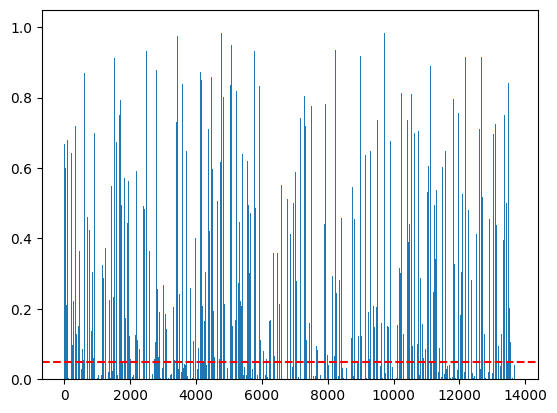

In [8]:
plt.bar(np.arange(len(f_arr)), f_arr)
plt.axhline(y=0.05, color='red', linestyle='--')
plt.show()

In [ ]:
#t값과 p값을 csv로 전환
td_adhd = Nonparametrics.u_value_array(os.path.join(proj, 'adhd_total_data_zpos_train0.8.csv'), 'td-adhd')
td_asd = Nonparametrics.u_value_array(os.path.join(proj, 'asd_total_data_zpos_train0.8.csv'), 'td-asd')

In [ ]:
td_adhd_p = Nonparametrics.p_value_array(os.path.join(proj, 'adhd_total_data_zpos_train0.8.csv'), 'td-adhd')
td_asd_p = Nonparametrics.p_value_array(os.path.join(proj, 'asd_total_data_zpos_train0.8.csv'), 'td-asd')

In [27]:
data = {
    'td-adhd': td_adhd,
    'td-asd' : td_asd,
}
data_df = pd.DataFrame(data)
data_p = {
    'td-adhd': td_adhd_p,
    'td-asd' : td_asd_p,
}
data_df_p = pd.DataFrame(data_p)
data_df.to_csv(os.path.join(proj, 'u_values.csv'))
data_df_p.to_csv(os.path.join(proj, 'p_values.csv'))
td_adhd_i = td_adhd[td_adhd_p<0.05]
td_asd_i = td_asd[td_asd_p<0.05]
important_features_t = td_adhd[td_adhd_p<0.05]

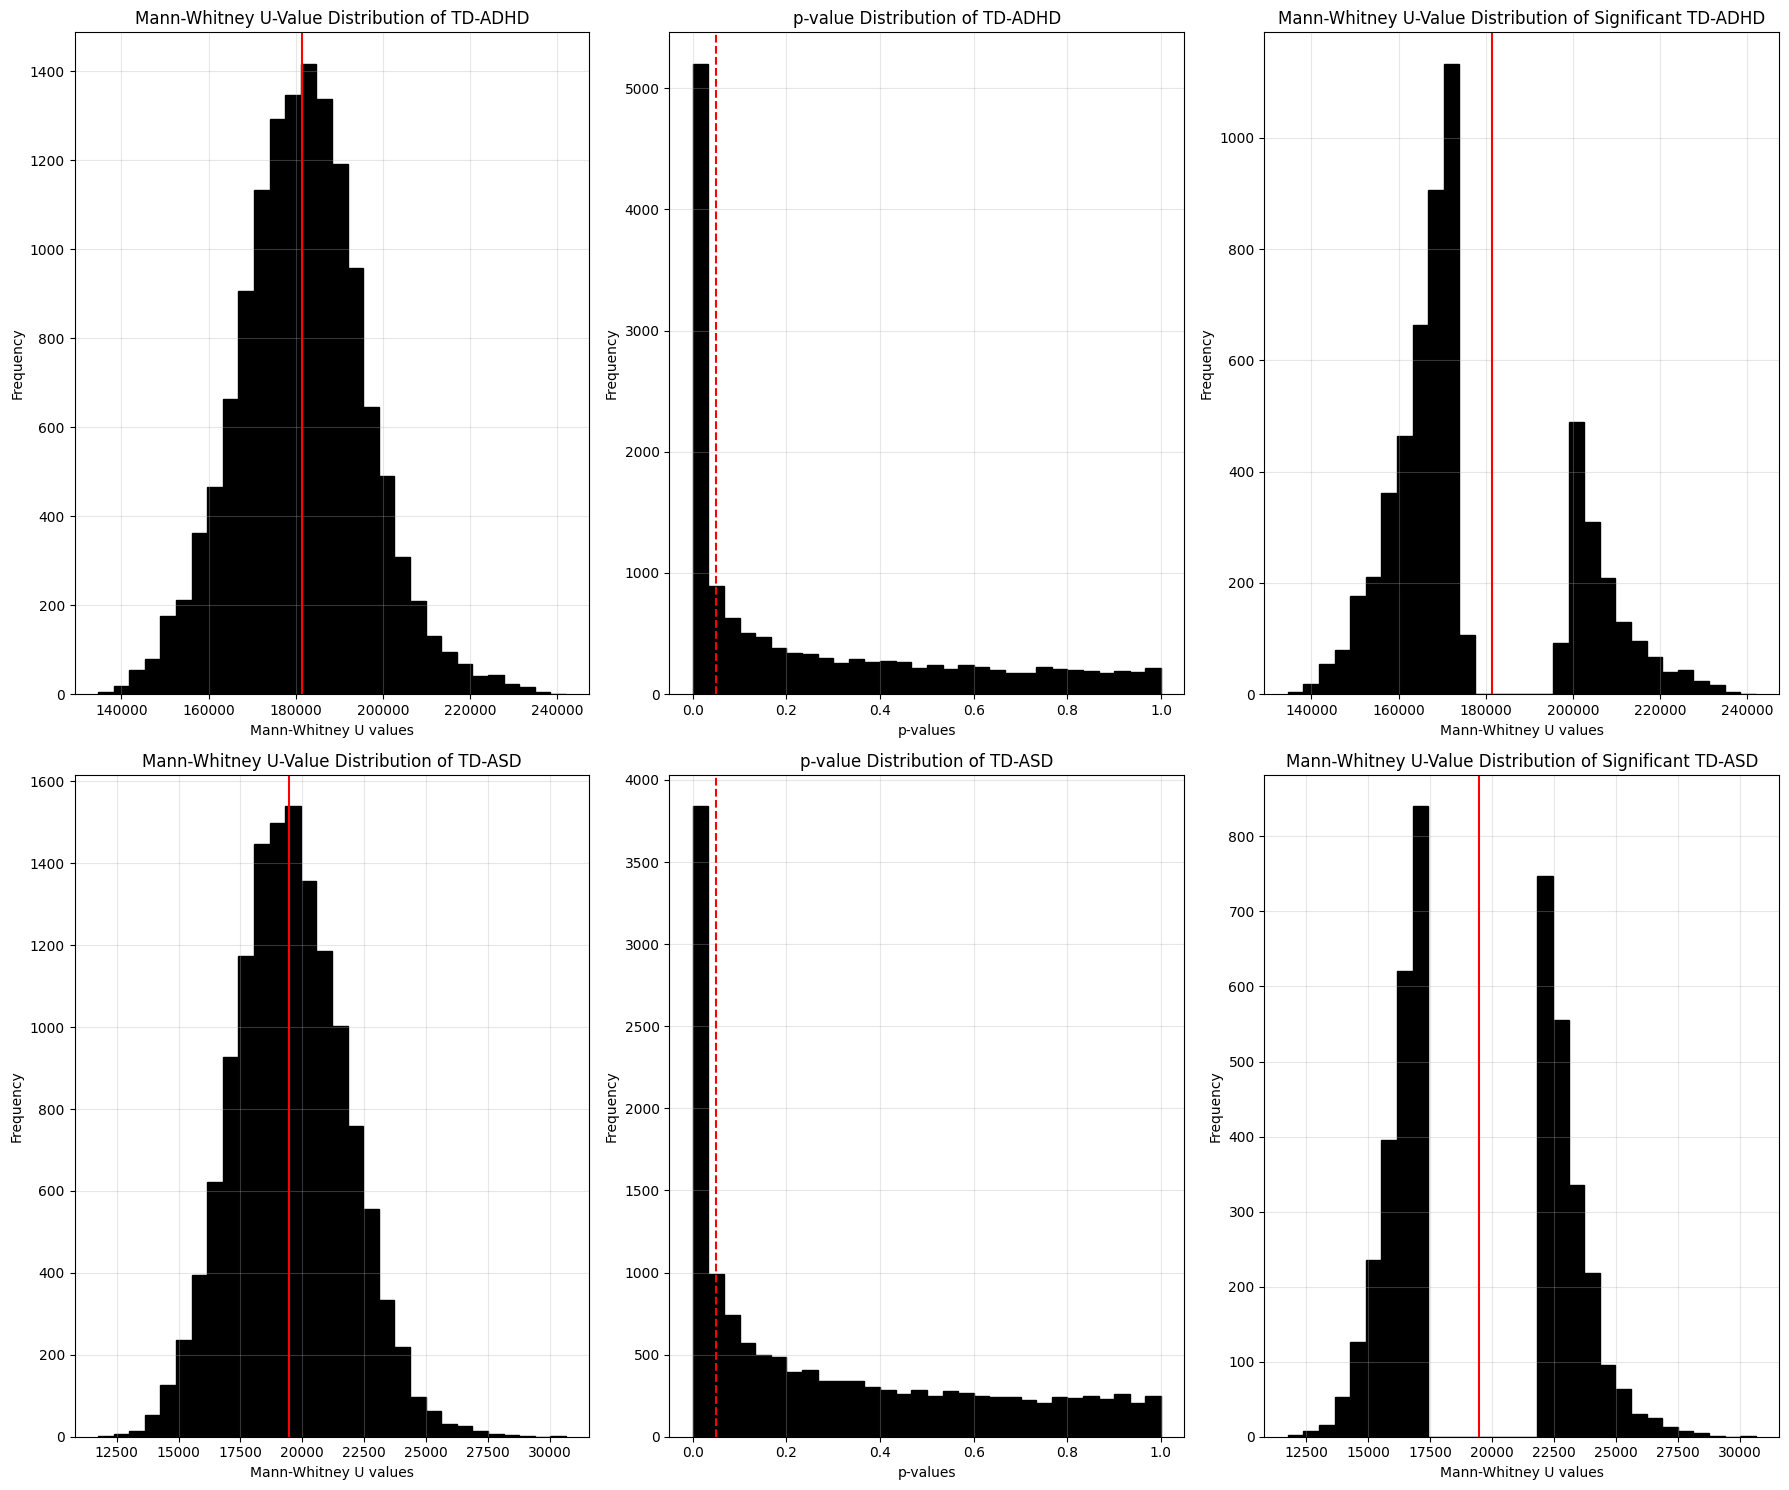

In [31]:
def plot_histogram(ax, data_list, title="Histogram", xlabel="Value", ylabel="Frequency", bins=30, median=None):
    """
    리스트의 값들에 대한 히스토그램을 그립니다.

    Args:
    - ax (Axes): 서브플롯의 축 객체
    - data_list (list): 히스토그램을 그릴 데이터가 포함된 리스트
    - title (str): 그래프의 제목
    - xlabel (str): x축 레이블
    - ylabel (str): y축 레이블
    - bins (int): 히스토그램의 막대 개수
    """
    ax.hist(data_list, bins=bins, color = 'black', edgecolor='black')
    if not median:
        ax.axvline(x=0.05, color='red', linestyle='--', label='p = 0.05')
    else:
        ax.axvline(x=median, color='red', label='median U-value')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True, alpha=0.3)

fig, axs = plt.subplots(2, 3, figsize=(18, 15))

plot_histogram(axs[0, 0], td_adhd, title="Mann-Whitney U-Value Distribution of TD-ADHD", xlabel="Mann-Whitney U values", ylabel="Frequency", median = np.median(td_adhd))
plot_histogram(axs[1, 0], td_asd, title="Mann-Whitney U-Value Distribution of TD-ASD", xlabel="Mann-Whitney U values", ylabel="Frequency", median = np.median(td_asd))
plot_histogram(axs[0, 1], td_adhd_p, title="p-value Distribution of TD-ADHD", xlabel="p-values", ylabel="Frequency")
plot_histogram(axs[1, 1], td_asd_p, title="p-value Distribution of TD-ASD", xlabel="p-values", ylabel="Frequency")
plot_histogram(axs[0, 2], td_adhd_i, title="Mann-Whitney U-Value Distribution of Significant TD-ADHD", xlabel="Mann-Whitney U values", ylabel="Frequency", median = np.median(td_adhd))
plot_histogram(axs[1, 2], td_asd_i, title="Mann-Whitney U-Value Distribution of Significant TD-ASD", xlabel="Mann-Whitney U values", ylabel="Frequency", median = np.median(td_asd))

plt.tight_layout()
plt.savefig(os.path.join(proj,'stat_dist.png'))